In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assignment/

Mounted at /content/drive
/content/drive/MyDrive/Assignment


In [2]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading CSV
data = pd.read_csv("World_Happiness_Report.csv")

In [5]:
# Display the first 10 rows
print("First 10 rows of the dataset:")
print(data.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [7]:
ro_col = data.shape
print("Number of Rows: ", ro_col[0])
print("Number of Columns: ",ro_col[1])

Number of Rows:  143
Number of Columns:  9


In [8]:
print("Data Types: ")
data.dtypes

Data Types: 


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [9]:
mean = data['score'].mean()
median = data['score'].median()
std_dev = data['score'].std()
print("Mean: ", mean)
print("Median: ", median)
print("Standard Deviation: ", std_dev)


Mean:  5.52758041958042
Median:  5.785
Standard Deviation:  1.1707165099442995


In [10]:
max_score = data['score'].max()
min_score = data['score'].min()
print("Maximum Score: ", max_score)
print("Minimum Score: ", min_score)

Maximum Score:  7.741
Minimum Score:  1.721


In [11]:
missing_values = data.isnull().sum()
missing_values


,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


In [12]:
filtered_df = data[data['score'] > 7.5]
filtered_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [13]:
sorted_df = filtered_df.sort_values(by = 'Log GDP per capita', ascending=False)
sorted_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [14]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)
print(data[['Happiness Category']])

    Happiness Category
0                 High
1                 High
2                 High
3                 High
4                 High
..                 ...
138                Low
139                Low
140                Low
141                Low
142                Low

[143 rows x 1 columns]


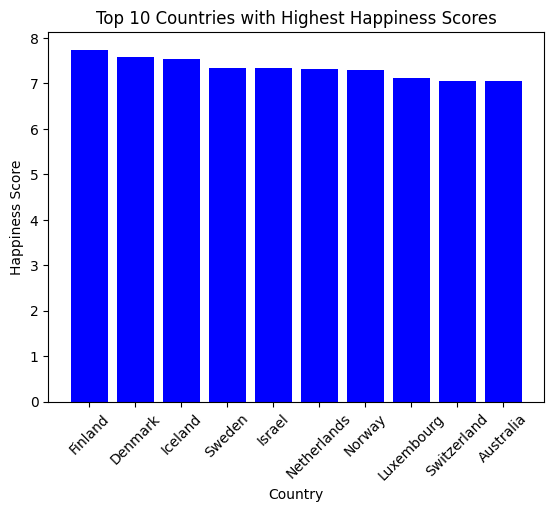

In [16]:
import matplotlib.pyplot as plt

top_ten_happiness = data.nlargest(10, 'score')
plt.bar(top_ten_happiness['Country name'], top_ten_happiness['score'], color='Blue')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Countries with Highest Happiness Scores')
plt.xticks(rotation=45)
plt.show()

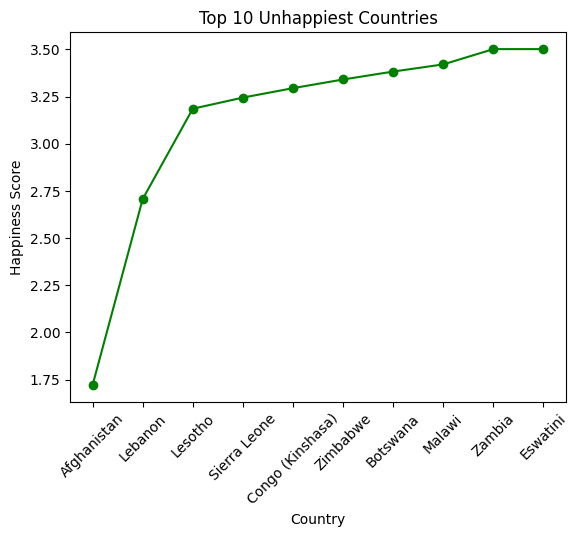

In [17]:
top_10_unhappiest = data.nsmallest(10, 'score')
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='Green')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45)
plt.show()

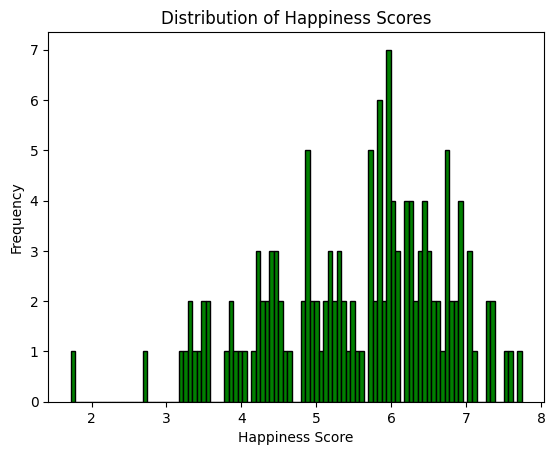

In [18]:
plt.hist(data['score'], bins=100, color='green', edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()

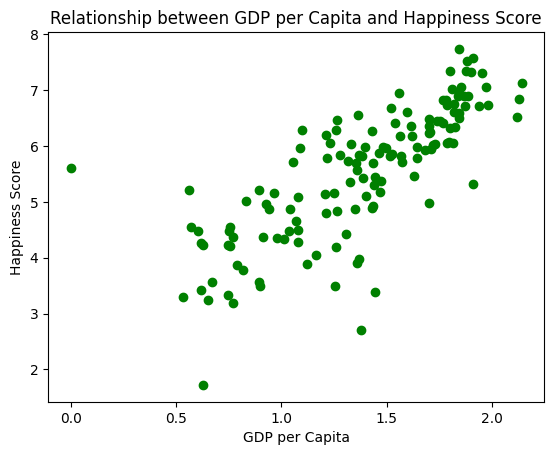

In [19]:
plt.scatter(data['Log GDP per capita'], data['score'], color='green')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.show()

In [20]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

In [21]:
# Step 1: Filter the dataset for South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)]


In [22]:
# Save the filtered South Asian dataset for future use
south_asia_data.to_csv('SouthAsia_Happiness.csv', index=False)
print("Filtered South Asian dataset saved as 'SouthAsia_Happiness.csv'")

Filtered South Asian dataset saved as 'SouthAsia_Happiness.csv'


In [23]:
south_asia_data = south_asia_data.copy()

# Create the Composite Score column
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)


In [24]:
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)

<ipython-input-27-80ab94457df5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='coolwarm')


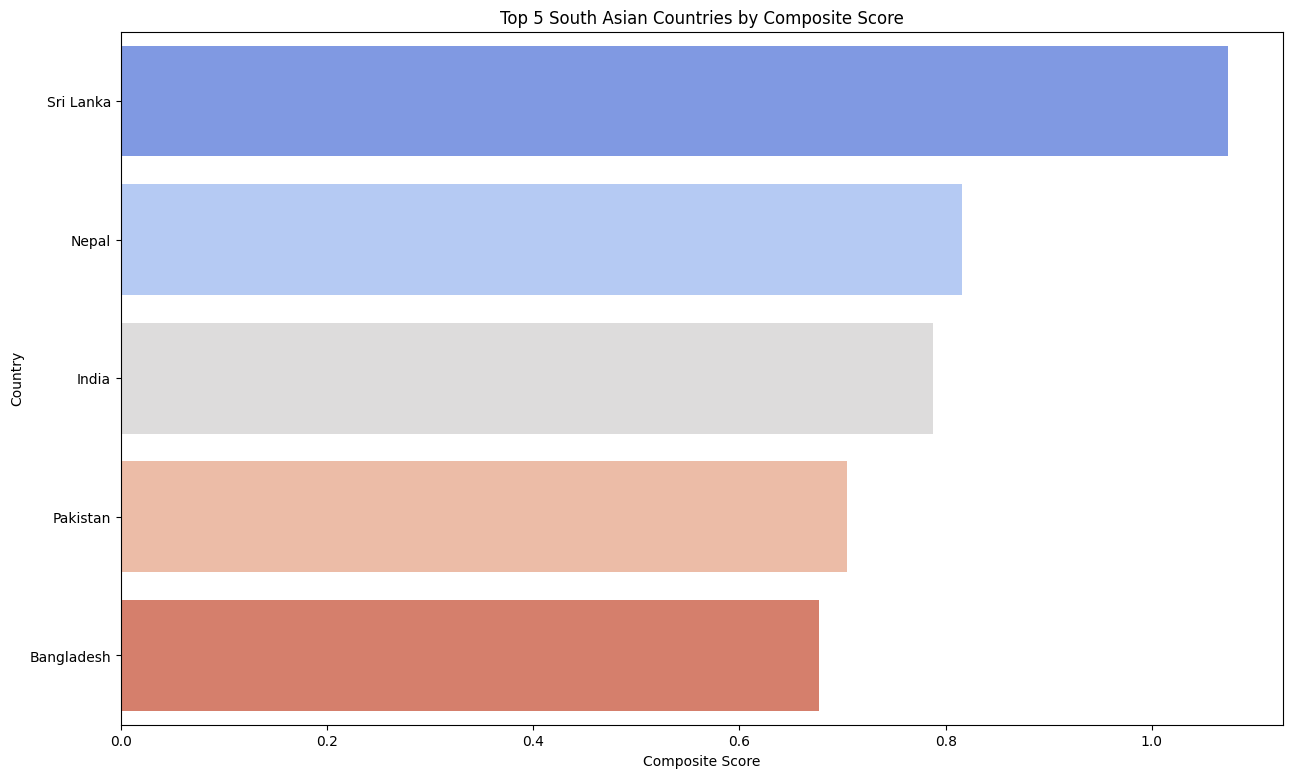

In [27]:
top_5_composite = south_asia_data.head(5)
plt.figure(figsize=(15, 9))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='coolwarm')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

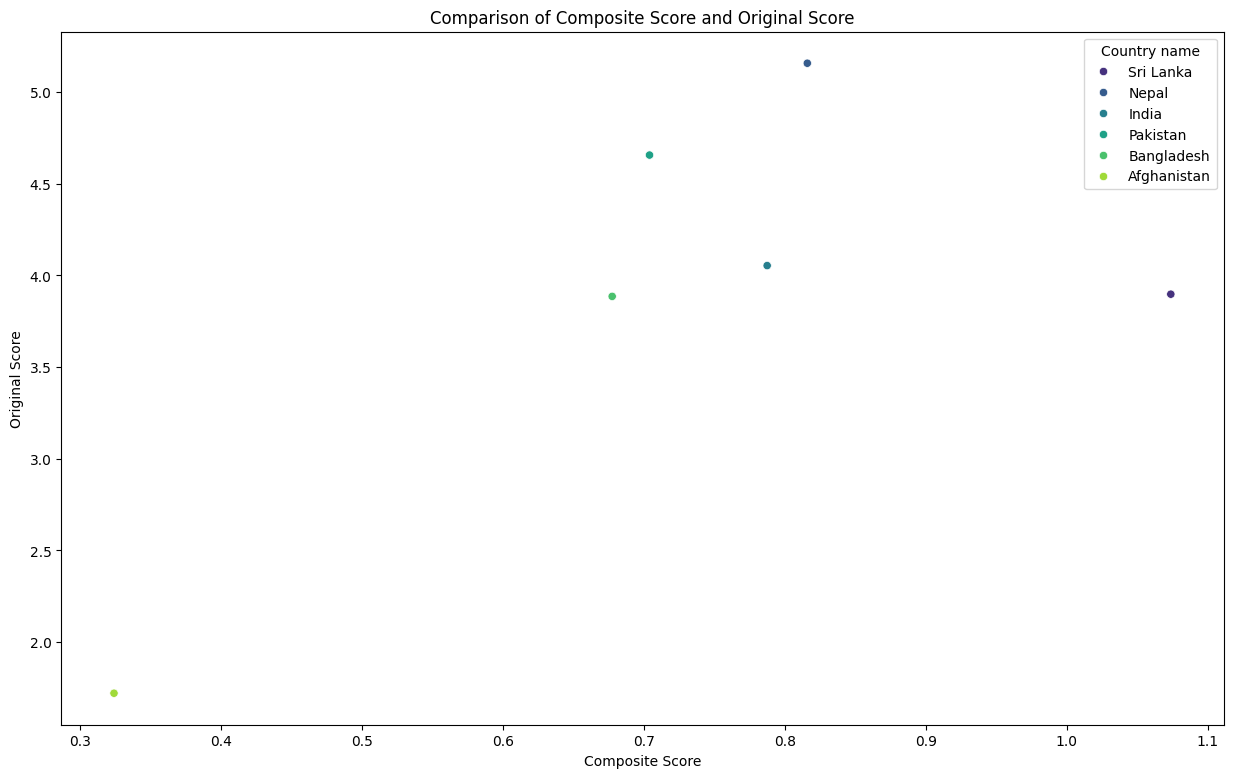

In [28]:
# 4. Compare Composite Score rankings with the original Score

plt.figure(figsize=(15, 9))
sns.scatterplot(x='Composite Score', y='score', data=south_asia_data, hue='Country name', palette='viridis')
plt.title('Comparison of Composite Score and Original Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.show()

In [29]:
# Task 3: Outlier Detection
# 1. Identify outliers based on Score and GDP per Capita using the 1.5x IQR rule
def detect_outliers(column):
    Q1 = south_asia_data[column].quantile(0.25)
    Q3 = south_asia_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return south_asia_data[(south_asia_data[column] < lower_bound) | (south_asia_data[column] > upper_bound)]

outliers_score = detect_outliers('score')
outliers_gdp = detect_outliers('Log GDP per capita')


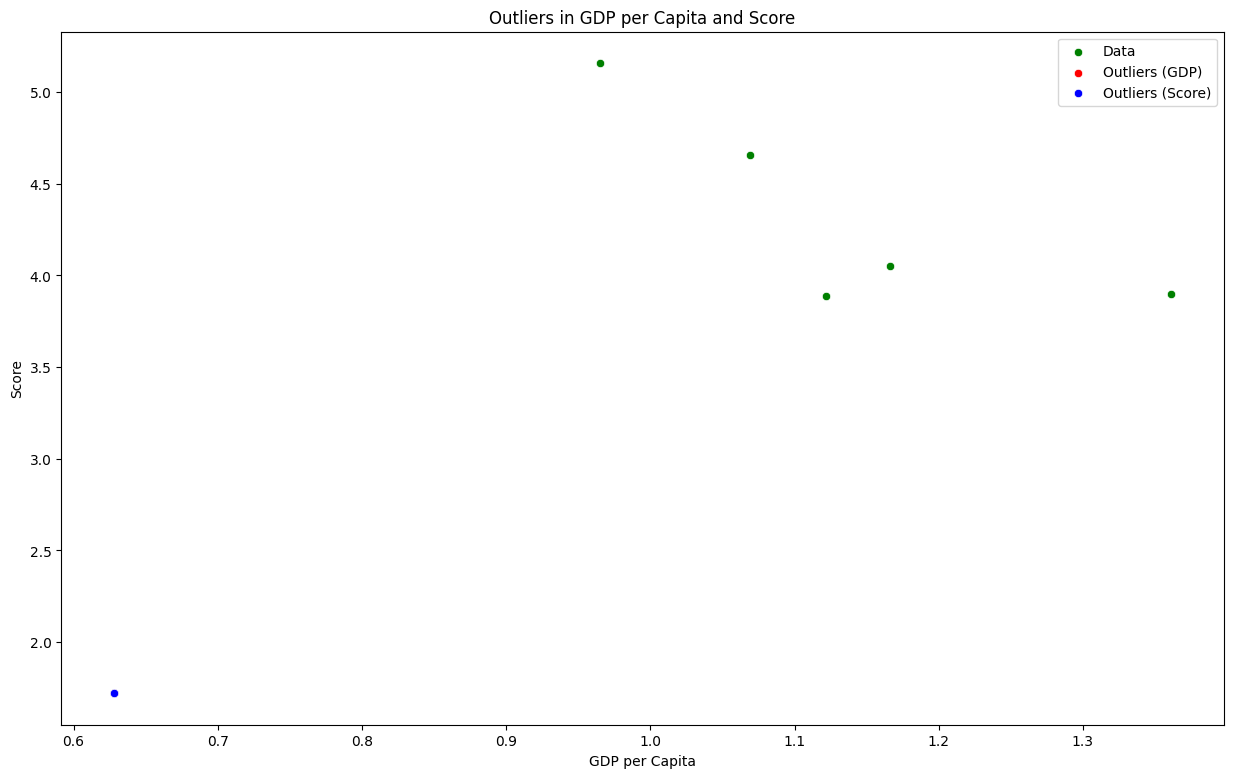

In [31]:
# 2. Scatter plot highlighting outliers
plt.figure(figsize=(15, 9))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='green', label='Data')
sns.scatterplot(x=outliers_gdp['Log GDP per capita'], y=outliers_gdp['score'], color='red', label='Outliers (GDP)')
sns.scatterplot(x=outliers_score['Log GDP per capita'], y=outliers_score['score'], color='blue', label='Outliers (Score)')
plt.title('Outliers in GDP per Capita and Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

In [32]:
# Task 4: Exploring Trends Across Metrics
# 1. Calculate Pearson correlation for selected metrics
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    correlation = south_asia_data[metric].corr(south_asia_data['score'])
    print(f"Pearson correlation between {metric} and Score: {correlation:.2f}")

Pearson correlation between Freedom to make life choices and Score: 0.80
Pearson correlation between Generosity and Score: 0.87


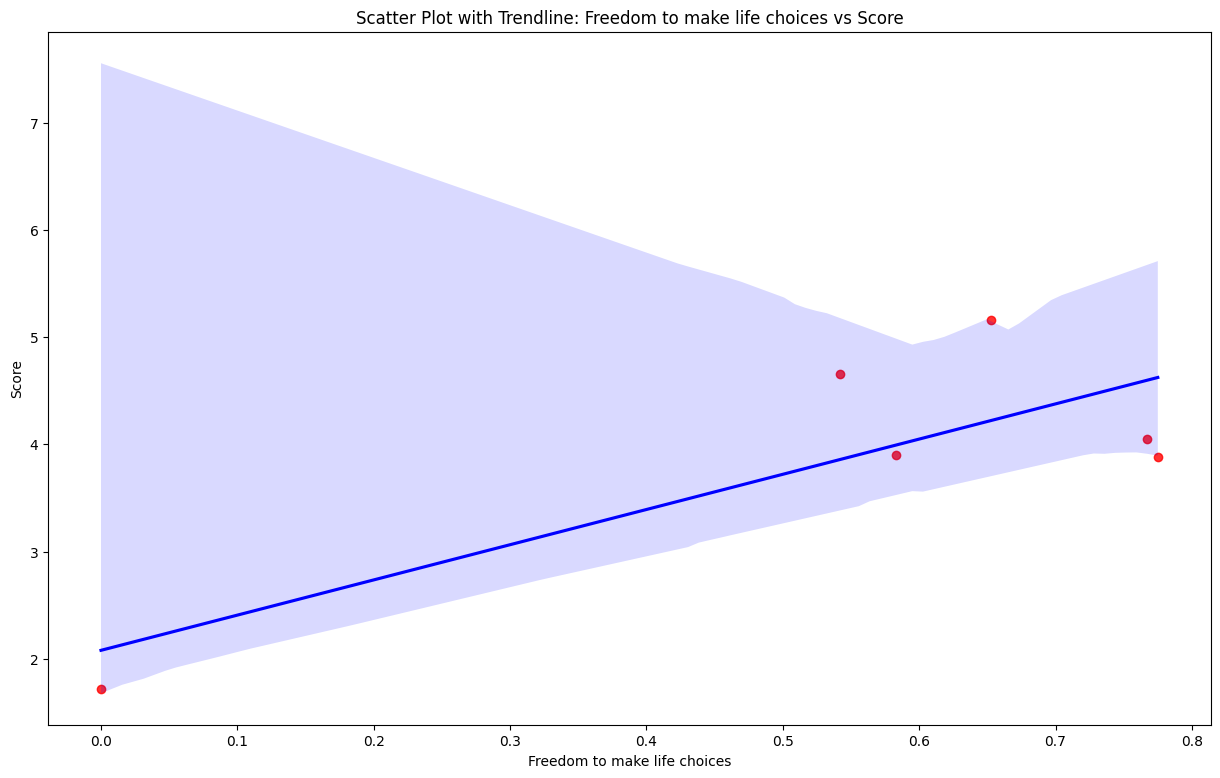

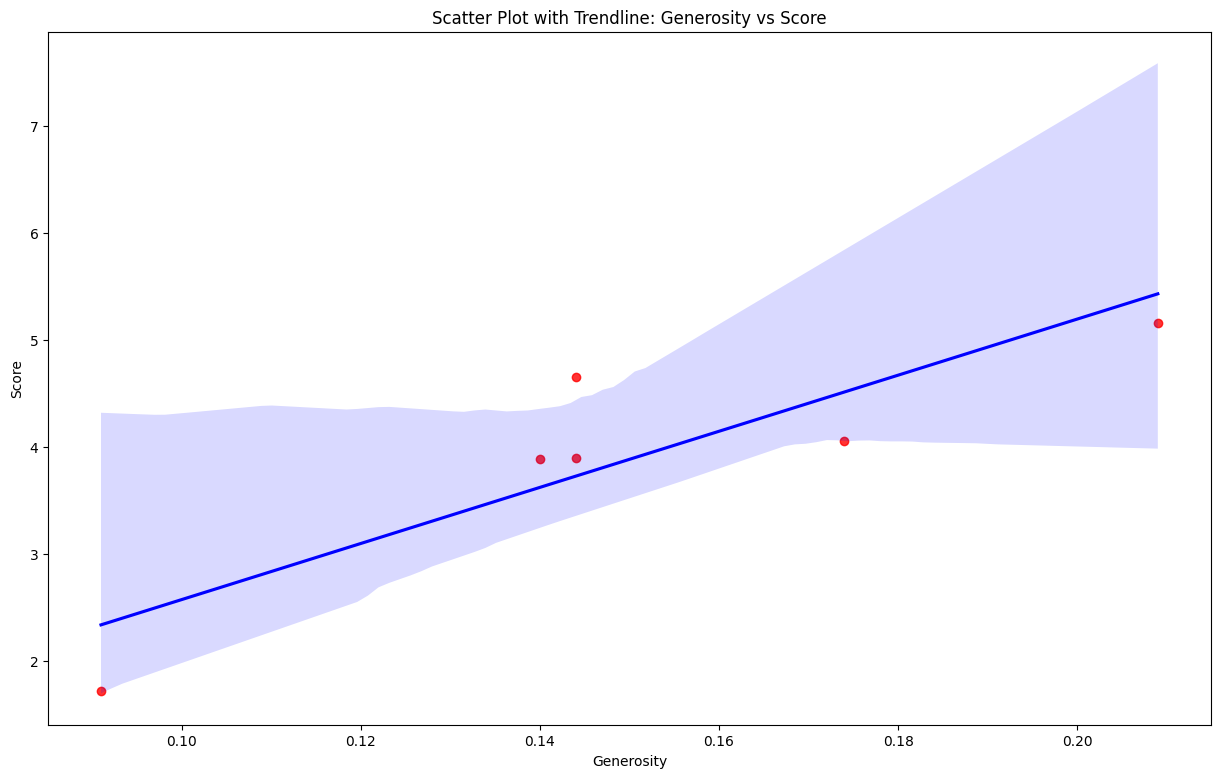

In [33]:
for metric in metrics:
    plt.figure(figsize=(15, 9))
    sns.regplot(x=metric, y='score', data=south_asia_data, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
    plt.title(f'Scatter Plot with Trendline: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()

In [34]:
# Task 5: Gap Analysis
# 1. Add a new column for GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']


In [35]:
# 2. Rank countries by GDP-Score Gap in ascending and descending order
gap_sorted_asc = south_asia_data.sort_values(by='GDP-Score Gap')
gap_sorted_desc = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

In [36]:
# 2. Rank countries by GDP-Score Gap in ascending and descending order
gap_sorted_asc = south_asia_data.sort_values(by='GDP-Score Gap')
gap_sorted_desc = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

In [37]:
# 3. Bar chart for top 3 countries with largest positive and negative gaps
top_3_positive_gap = gap_sorted_desc.head(3)
top_3_negative_gap = gap_sorted_asc.head(3)

<ipython-input-38-ecff2128b9b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([top_3_positive_gap, top_3_negative_gap]), palette='Spectral')


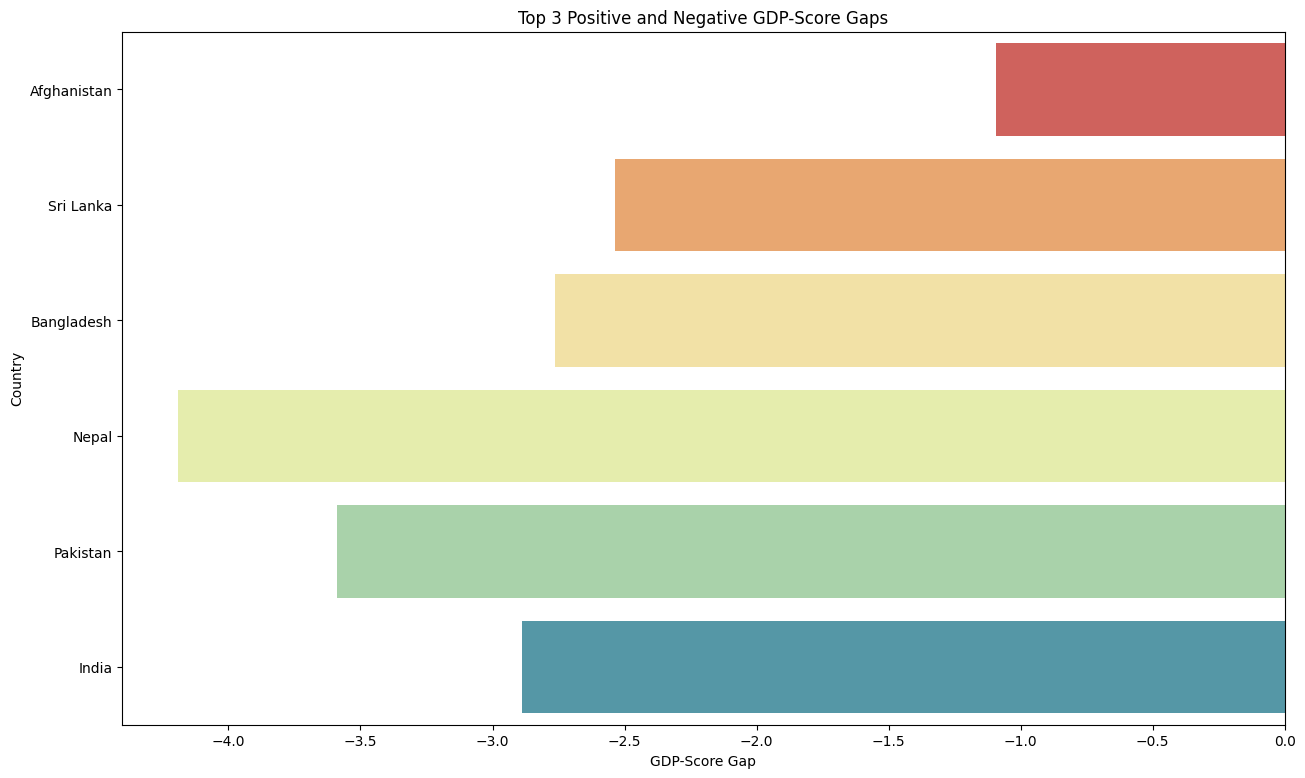

In [38]:
plt.figure(figsize=(15, 9))
sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([top_3_positive_gap, top_3_negative_gap]), palette='Spectral')
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

In [39]:
# 4. Analysis of gaps
print("\nAnalysis of GDP-Score Gaps:")
print("Top 3 Positive Gaps:")
print(top_3_positive_gap[['Country name', 'GDP-Score Gap']])
print("\nTop 3 Negative Gaps:")
print(top_3_negative_gap[['Country name', 'GDP-Score Gap']])


Analysis of GDP-Score Gaps:
Top 3 Positive Gaps:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 Negative Gaps:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


In [40]:
# Define Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon","Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

In [41]:
# Filter dataset for Middle Eastern countries
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
middle_east_data = middle_east_data.copy()

In [42]:
# Save Middle Eastern dataset for future use
middle_east_data.to_csv('MiddleEast_Happiness.csv', index=False)
print("Filtered Middle Eastern dataset saved as 'MiddleEast_Happiness.csv'")

Filtered Middle Eastern dataset saved as 'MiddleEast_Happiness.csv'


In [43]:
# 1. Descriptive Statistics
# Calculate mean and standard deviation of Score for South Asia and Middle East
south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Std Dev: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Std Dev: {middle_east_std:.2f}")

# Which region has higher happiness scores on average?
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

South Asia - Mean Score: 3.90, Std Dev: 1.18
Middle East - Mean Score: 5.41, Std Dev: 1.57
Middle East has a higher average happiness score.


<ipython-input-44-8cced82d477f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([south_asia_top3, south_asia_bottom3]), palette='viridis')
<ipython-input-44-8cced82d477f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([middle_east_top3, middle_east_bottom3]), palette='plasma')


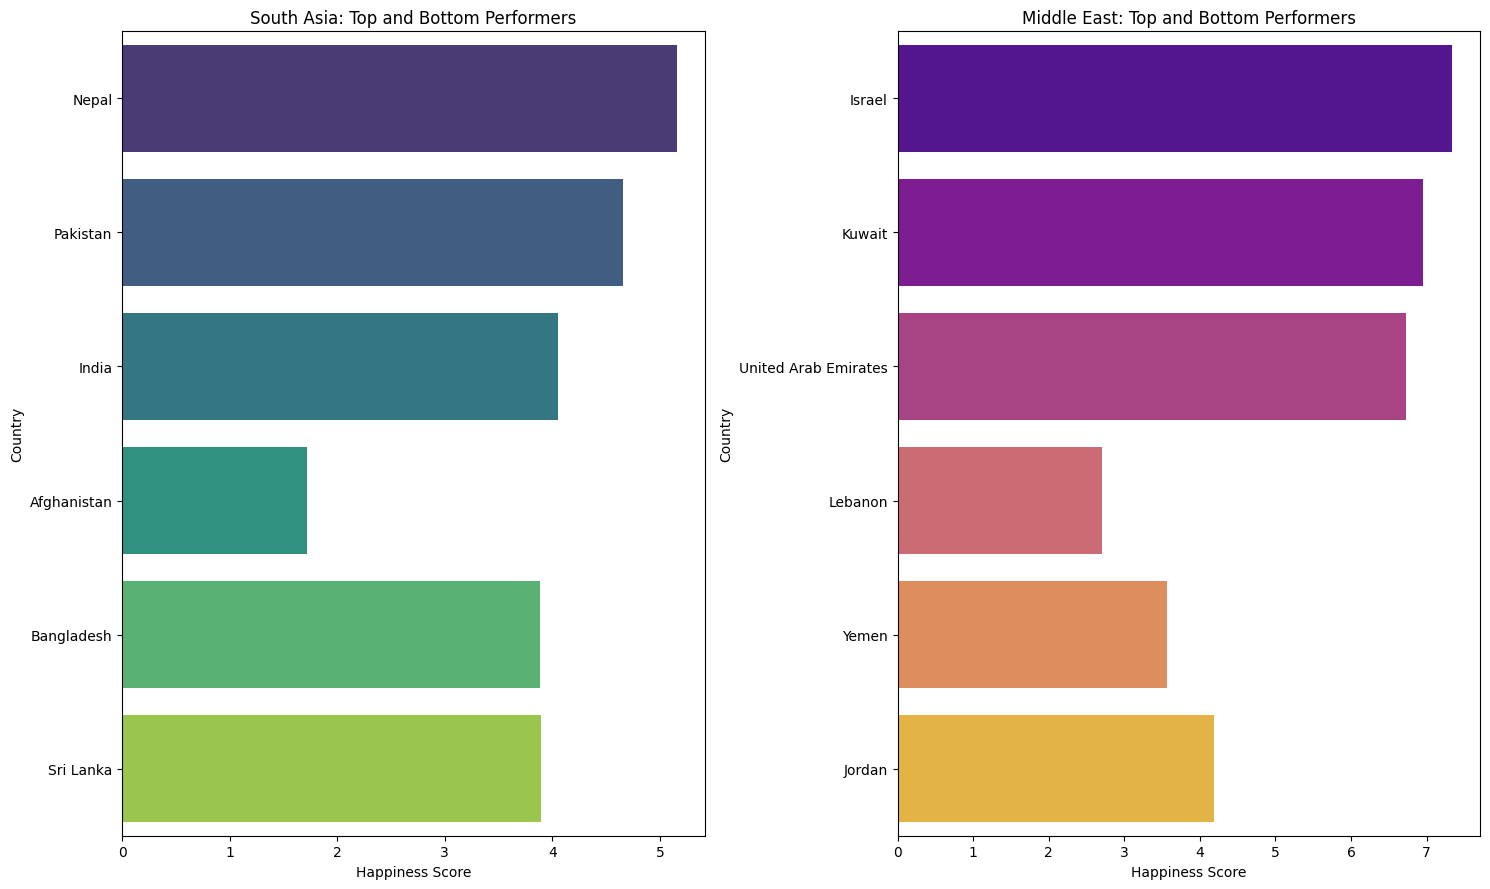

In [44]:
# 2. Top and Bottom Performers
# Identify top 3 and bottom 3 countries by Score in each region
south_asia_top3 = south_asia_data.nlargest(3, 'score')
south_asia_bottom3 = south_asia_data.nsmallest(3, 'score')
middle_east_top3 = middle_east_data.nlargest(3, 'score')
middle_east_bottom3 = middle_east_data.nsmallest(3, 'score')

# Bar chart for top 3 and bottom 3 countries
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=pd.concat([south_asia_top3, south_asia_bottom3]), palette='viridis')
plt.title('South Asia: Top and Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=pd.concat([middle_east_top3, middle_east_bottom3]), palette='plasma')
plt.title('Middle East: Top and Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

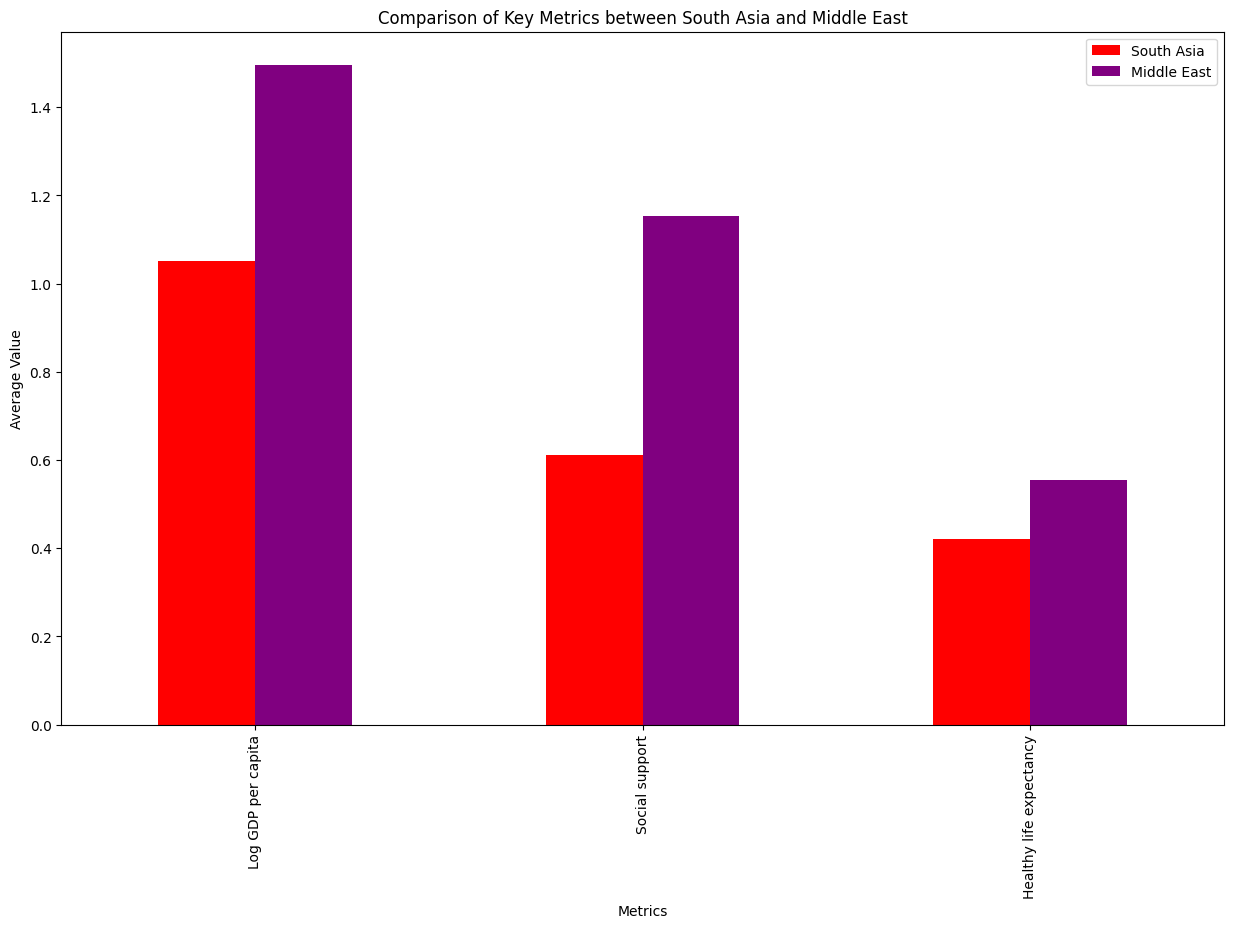

Metric with largest disparity: Social support


In [46]:
# 3. Metric Comparisons
# Grouped bar chart for key metrics
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_means = south_asia_data[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

comparison_df = pd.DataFrame({'South Asia': south_asia_means, 'Middle East': middle_east_means})
comparison_df.plot(kind='bar', figsize=(15, 9), color=['red', 'purple'])
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.ylabel('Average Value')
plt.xlabel('Metrics')
plt.legend()
plt.show()

# Which metric shows the largest disparity?
disparity = (middle_east_means - south_asia_means).abs()
print("Metric with largest disparity:", disparity.idxmax())

In [47]:

# 4. Happiness Disparity
# Compute range and coefficient of variation for Score
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()

south_asia_cv = south_asia_std / south_asia_mean
middle_east_cv = middle_east_std / middle_east_mean

print(f"South Asia - Range: {south_asia_range:.2f}, Coefficient of Variation: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, Coefficient of Variation: {middle_east_cv:.2f}")

# Which region has greater variability?
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
else:
    print("Middle East has greater variability in happiness scores.")

South Asia - Range: 3.44, Coefficient of Variation: 0.30
Middle East - Range: 4.63, Coefficient of Variation: 0.29
South Asia has greater variability in happiness scores.


Correlation of Score with Freedom to make life choices in South Asia: 0.80
Correlation of Score with Freedom to make life choices in Middle East: 0.86
Correlation of Score with Generosity in South Asia: 0.87
Correlation of Score with Generosity in Middle East: 0.63


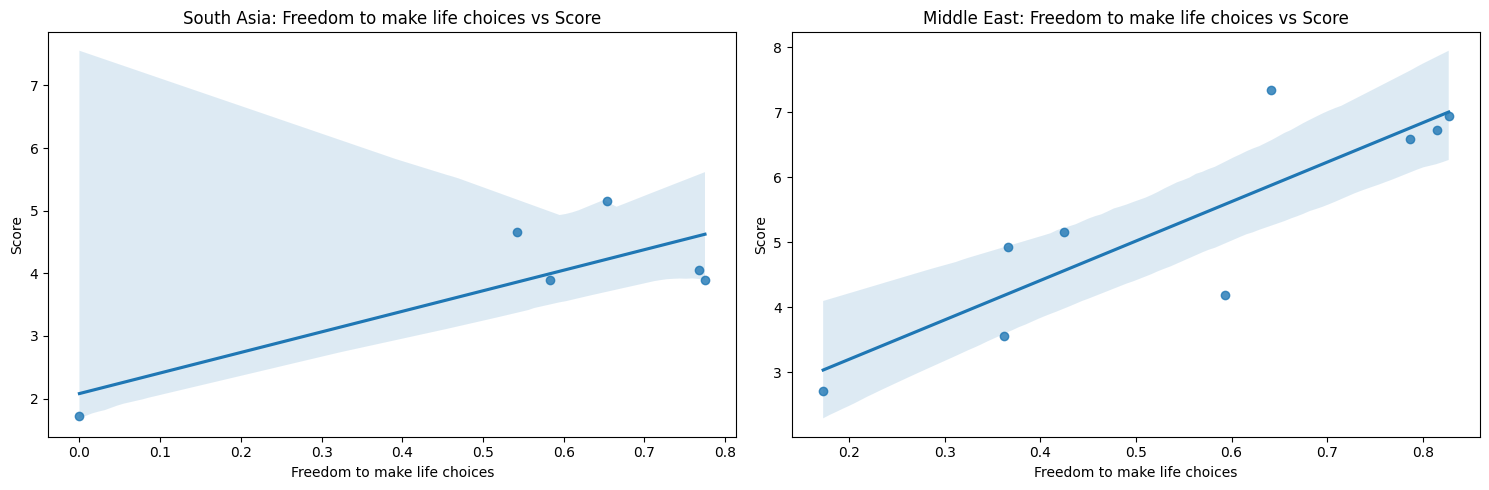

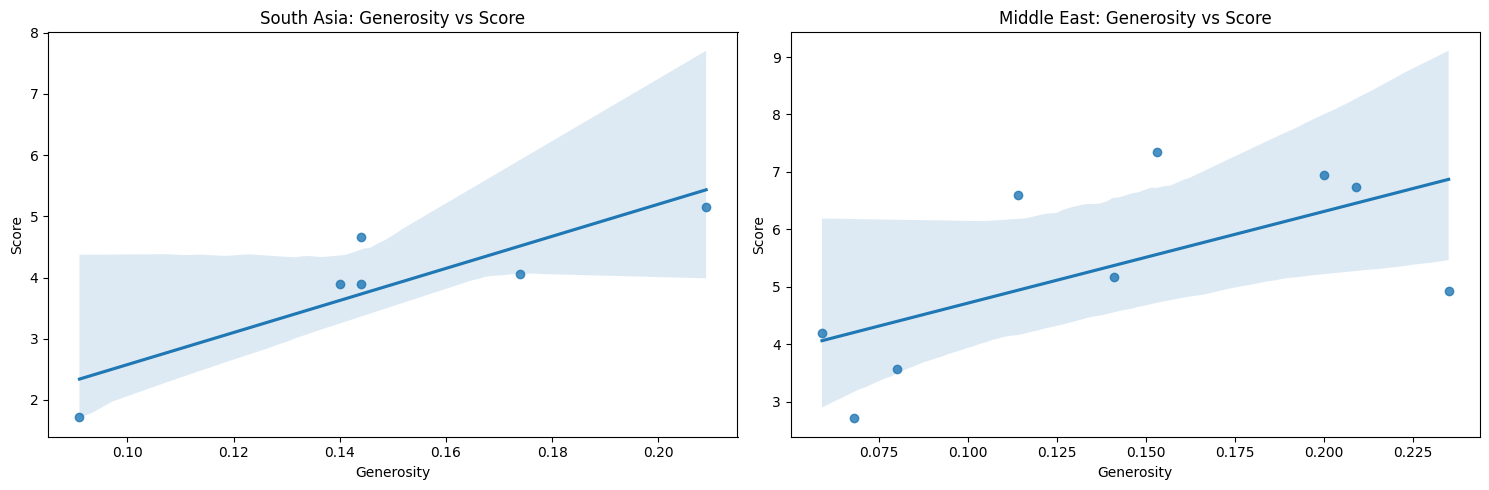

In [48]:
# 5. Correlation Analysis
# Correlation of Score with selected metrics
metrics_to_analyze = ['Freedom to make life choices', 'Generosity']
for metric in metrics_to_analyze:
    south_asia_corr = south_asia_data['score'].corr(south_asia_data[metric])
    middle_east_corr = middle_east_data['score'].corr(middle_east_data[metric])
    print(f"Correlation of Score with {metric} in South Asia: {south_asia_corr:.2f}")
    print(f"Correlation of Score with {metric} in Middle East: {middle_east_corr:.2f}")

# Scatter plots for correlations
for metric in metrics_to_analyze:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.regplot(x=metric, y='score', data=south_asia_data)
    plt.title(f'South Asia: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')

    plt.subplot(1, 2, 2)
    sns.regplot(x=metric, y='score', data=middle_east_data)
    plt.title(f'Middle East: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()

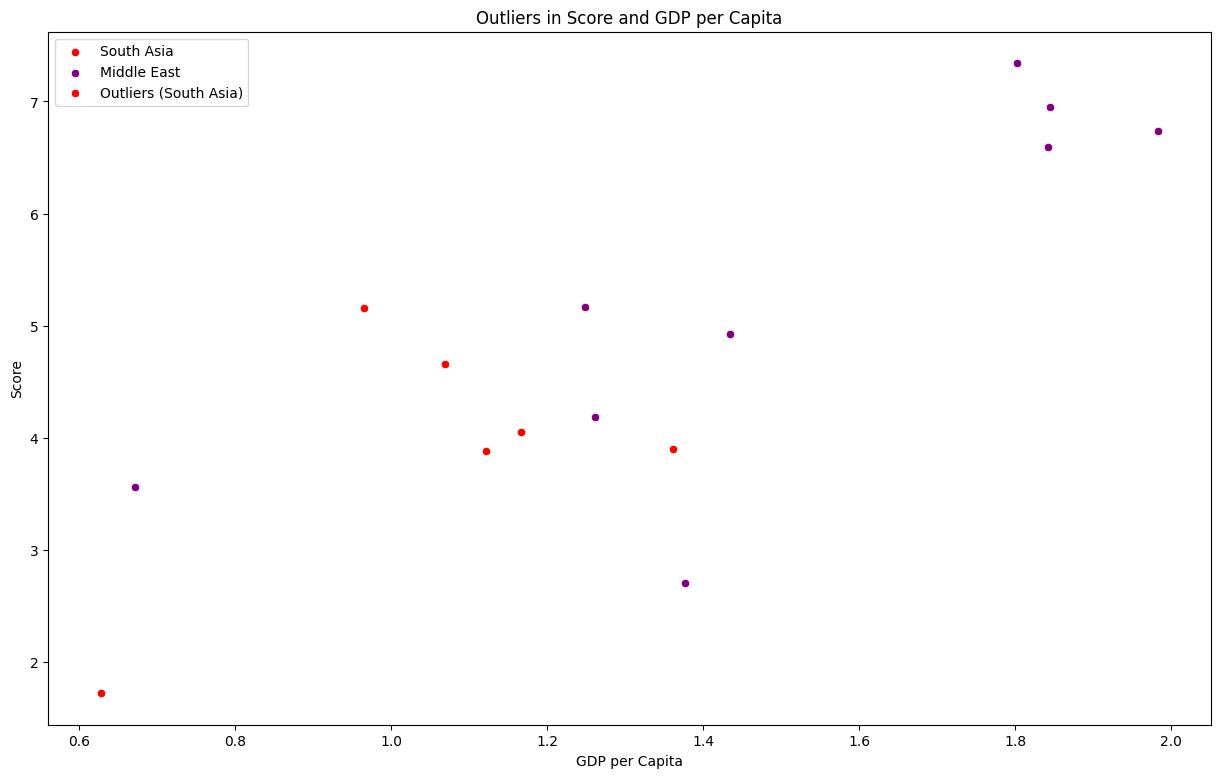

In [49]:

# 6. Outlier Detection
# Detect outliers in both regions
def detect_outliers(column, region_data):
    Q1 = region_data[column].quantile(0.25)
    Q3 = region_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return region_data[(region_data[column] < lower_bound) | (region_data[column] > upper_bound)]

south_asia_outliers = detect_outliers('score', south_asia_data)
middle_east_outliers = detect_outliers('score', middle_east_data)

# Scatter plot highlighting outliers
plt.figure(figsize=(15, 9))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='red', label='South Asia')
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, color='purple', label='Middle East')
sns.scatterplot(x=south_asia_outliers['Log GDP per capita'], y=south_asia_outliers['score'], color='red', label='Outliers (South Asia)')
sns.scatterplot(x=middle_east_outliers['Log GDP per capita'], y=middle_east_outliers['score'], color='green', label='Outliers (Middle East)')
plt.title('Outliers in Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

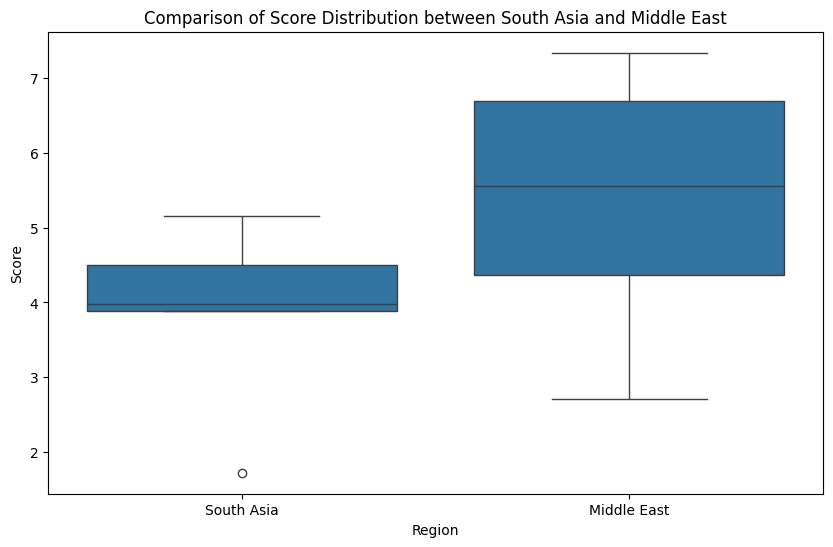

In [50]:
# 7. Visualization: Boxplot Comparison
# Boxplot for Score distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    south_asia_data.assign(Region='South Asia'),
    middle_east_data.assign(Region='Middle East')
]))
plt.title('Comparison of Score Distribution between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()